In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

# 이미지 불러오기
image_path = 'mri_gray.jpg'
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 이미지 정규화
normalized_image = gray_image.astype(np.float32) / 255.0


            
# 결과를 0~1 범위로 정규화
min_val = gray_image.min()
max_val = gray_image.max()
normalized_image = (gray_image - min_val) / (max_val - min_val)


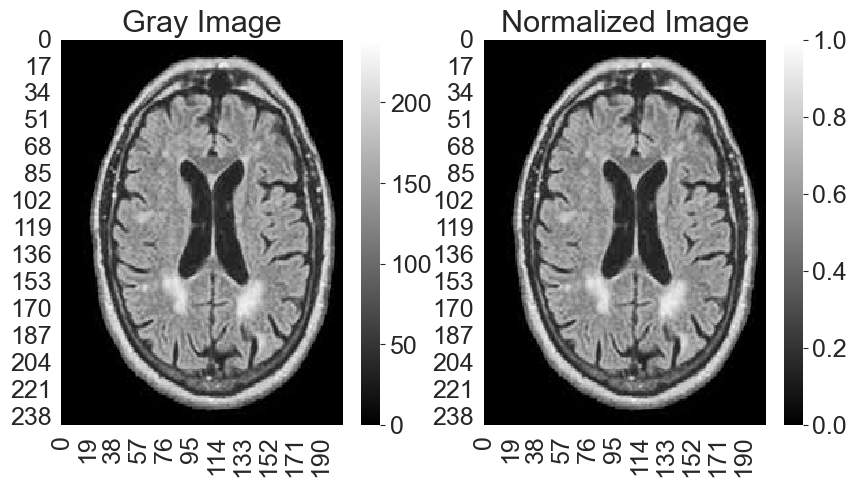

In [18]:

plt.rcParams['axes.titlesize'] = 22


fig, axs = plt.subplots(1, 2, figsize=(10, 5)) 

sns.heatmap(gray_image, cmap='gray', ax=axs[0]) 
axs[0].set_title('Gray Image') 

sns.heatmap(normalized_image, cmap='gray', ax=axs[1])
axs[1].set_title('Normalized Image')

plt.show()
# 그래프 저장
fig.savefig("normalization", dpi=300)

In [19]:
def apply_convolution(input_image, filter_kernel):
    
    image_H, image_W = input_image.shape
    kernel_H, kernel_W = filter_kernel.shape
    padding_H = kernel_H // 2
    padding_W = kernel_W // 2
    
    # 패딩 포함 이미지 초기화
    padded_image = np.zeros((image_H + 2 * padding_H, image_W + 2 * padding_W))
    
    # 이미지 중앙에 위치
    padded_image[padding_H:padding_H + image_H, padding_W:padding_W + image_W] = input_image
    
    # 출력 이미지 초기화
    featuremap = np.zeros_like(input_image)

    # 컨볼루션 연산
    for y in range(image_H):
        for x in range(image_W):
            region = padded_image[y:y + kernel_H, x:x + kernel_W]
            featuremap[y, x] = np.sum(filter_kernel * region)
            
            
    # 결과를 0~1 범위로 정규화
    min_val = featuremap.min()
    max_val = featuremap.max()
    featuremap = (featuremap - min_val) / (max_val - min_val)

    return featuremap


In [20]:
def show_plt(filters_3x3, filters_5x5, save_name):
    # 결과 딕셔너리 초기화
    convolution_results_3x3 = {}
    convolution_results_5x5 = {}

    for name, kernel in filters_3x3.items():
        convolution_results_3x3[f'{name}'] = apply_convolution(normalized_image, kernel)
    for name, kernel in filters_5x5.items():
        convolution_results_5x5[f'{name}'] = apply_convolution(normalized_image, kernel)

    max_width_len = max(len(convolution_results_3x3), len(convolution_results_5x5))
    
    
    fig, ax = plt.subplots(2, max_width_len + 1, figsize=(4 * (max_width_len + 1), 8))
    fig.set_facecolor('white')

    
    # 3X3 컨볼루션 그래프
    ax[0, 0].imshow(normalized_image, cmap='gray')
    ax[0, 0].set_title('Original Image')
    ax[0, 0].grid(False)
    for i, (filter_name, result) in enumerate(convolution_results_3x3.items()):
        ax[0, i+1].imshow(result, cmap='gray', interpolation='none')
        ax[0, i+1].set_title(filter_name)
        ax[0, i+1].grid(False)
        
    # 5X5 컨볼루션 그래프
    ax[1, 0].imshow(normalized_image, cmap='gray')
    ax[1, 0].set_title('Original Image')
    ax[1, 0].grid(False)
    for i, (filter_name, result) in enumerate(convolution_results_5x5.items()):
        ax[1, i+1].imshow(result, cmap='gray', interpolation='none')
        ax[1, i+1].set_title(filter_name)
        ax[1, i+1].grid(False)

    
    plt.show()
    
    # 그래프 저장
    fig.savefig(f"{save_name}.png", dpi=300)

In [30]:

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 



def show_plt_sns(filters_3x3, filters_5x5, save_name):
    # 결과 딕셔너리 초기화
    convolution_results_3x3 = {}
    convolution_results_5x5 = {}

    for name, kernel in filters_3x3.items():
        convolution_results_3x3[f'{name}'] = apply_convolution(normalized_image, kernel)
    for name, kernel in filters_5x5.items():
        convolution_results_5x5[f'{name}'] = apply_convolution(normalized_image, kernel)

    max_width_len = max(len(convolution_results_3x3), len(convolution_results_5x5))
    
    
    fig, ax = plt.subplots(2, max_width_len + 1, figsize=(4 * (max_width_len + 1), 8))
    fig.set_facecolor('white')

    
    # 3X3 컨볼루션 그래프
    sns.heatmap(normalized_image, ax=ax[0, 0], cmap='gray')
    ax[0, 0].set_title('Original Image')
    ax[0, 0].grid(False)
    ax[0, 0].axis('off')
    for i, (filter_name, result) in enumerate(convolution_results_3x3.items()):
        sns.heatmap(result, ax=ax[0, i+1], cmap='gray')
        ax[0, i+1].set_title(filter_name)
        ax[0, i+1].grid(False)
        ax[0, i+1].axis('off')
        
    # 5X5 컨볼루션 그래프
    sns.heatmap(normalized_image, ax=ax[1, 0], cmap='gray')
    ax[1, 0].set_title('Original Image')
    ax[1, 0].grid(False)
    ax[1, 0].axis('off')
    for i, (filter_name, result) in enumerate(convolution_results_5x5.items()):
        sns.heatmap(result, ax=ax[1, i+1], cmap='gray')
        ax[1, i+1].set_title(filter_name)
        ax[1, i+1].grid(False)
        ax[1, i+1].axis('off')

    
    plt.show()
    
    # 그래프 저장
    fig.savefig(f"{save_name}_sns.png", dpi=300)


In [22]:
def save_kernel_sns(kernel_name, kernel_array):
    plt.figure(figsize=(5,5))
    sns.heatmap(kernel_array, annot=True, fmt=".2f", cmap='gray', cbar=False, square=True, annot_kws={"size": 20})
    plt.title(kernel_name, fontsize=20)
    plt.xticks([])
    plt.yticks([])
    plt.savefig(f"{kernel_name}.png") 
    plt.close()


In [23]:
# 필터 딕셔너리 초기화
filters_3x3 = {}
filters_5x5 = {}

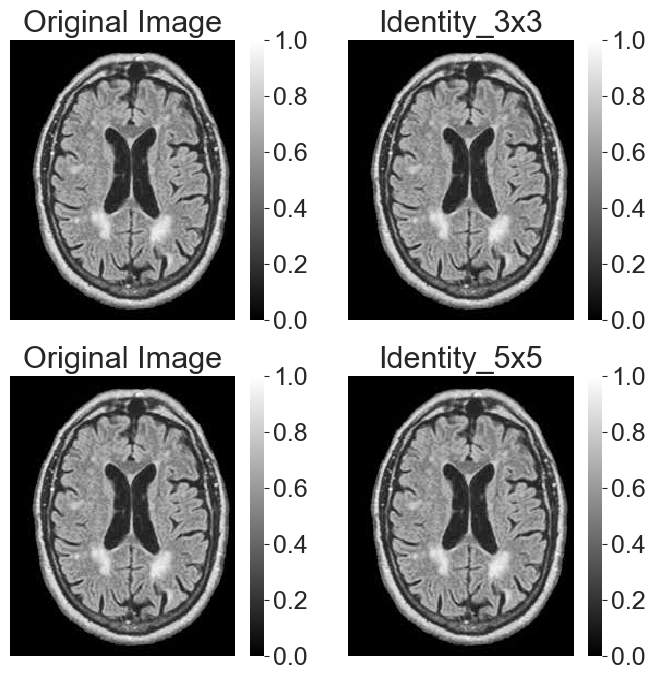

In [24]:
Identity_3x3 = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]], dtype=np.float32)

Identity_5x5 = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]], dtype=np.float32)
show_plt_sns(
    {'Identity_3x3': Identity_3x3},
    {'Identity_5x5': Identity_5x5}, "Identity")

save_kernel_sns("Identity_3x3", Identity_3x3)
save_kernel_sns("Identity_5x5", Identity_5x5)

filters_3x3['Identity_3x3'] = Identity_3x3
filters_5x5['Identity_5x5'] = Identity_5x5

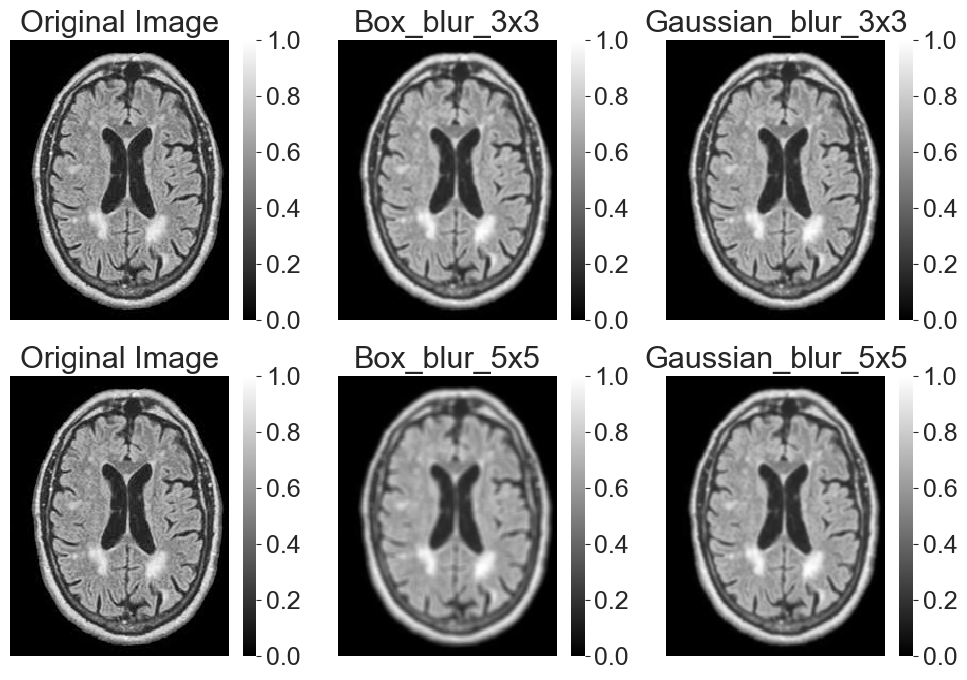

In [25]:
Box_blur_3x3 = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]], dtype=np.float32) / 9.0
Box_blur_5x5 = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1]], dtype=np.float32) / 25.0


Gaussian_blur_3x3 = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]], dtype=np.float32) / 16.0
Gaussian_blur_5x5 = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]], dtype=np.float32) / 256.0

show_plt_sns(
    {'Box_blur_3x3': Box_blur_3x3, 'Gaussian_blur_3x3': Gaussian_blur_3x3},
    {'Box_blur_5x5': Box_blur_5x5, 'Gaussian_blur_5x5': Gaussian_blur_5x5}, "blur")

save_kernel_sns("Box_blur_3x3", Box_blur_3x3)
save_kernel_sns("Gaussian_blur_3x3", Gaussian_blur_3x3)
save_kernel_sns("Box_blur_5x5", Box_blur_5x5)
save_kernel_sns("Gaussian_blur_5x5", Gaussian_blur_5x5)

filters_3x3['Blur_3x3'] = Gaussian_blur_3x3
filters_5x5['Blur_5x5'] = Gaussian_blur_5x5

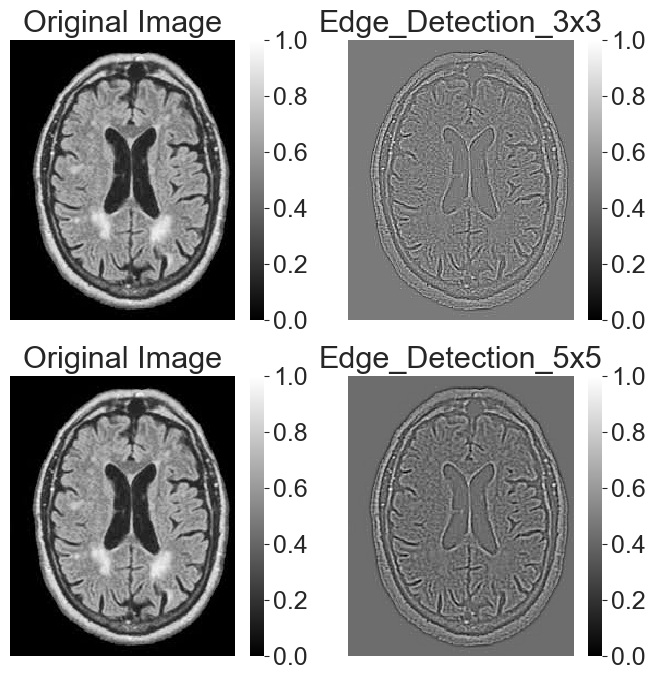

In [31]:
Edge_Detection_3x3 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]], dtype=np.float32)
Edge_Detection_5x5 = np.array([
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, 24, -1, -1],
    [-1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1]], dtype=np.float32)
show_plt_sns(
    {'Edge_Detection_3x3': Edge_Detection_3x3},
    {'Edge_Detection_5x5': Edge_Detection_5x5}, "Edge Detection")

save_kernel_sns("Edge_Detection_3x3", Edge_Detection_3x3)
save_kernel_sns("Edge_Detection_5x5", Edge_Detection_5x5)

filters_3x3['Edge Detection_3x3'] = Edge_Detection_3x3
filters_5x5['Edge Detection_5x5'] = Edge_Detection_5x5

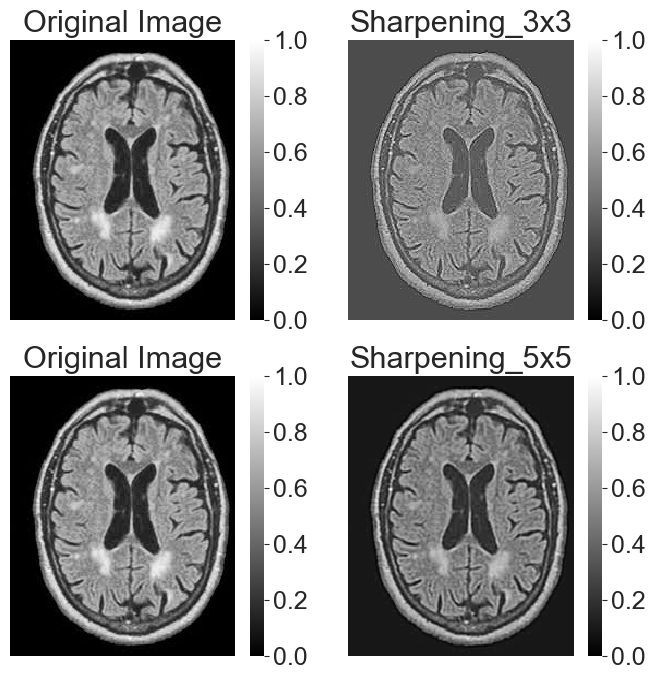

In [27]:
Sharpening_3x3 = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]], dtype=np.float32)
Sharpening_5x5 = np.array([
    [-1, -1, -1, -1, -1],
    [-1, 2, 2, 2, -1],
    [-1, 2, 18, 2, -1],
    [-1, 2, 2, 2, -1],
    [-1, -1, -1, -1, -1]], dtype=np.float32) / 8.0
show_plt_sns(
    {'Sharpening_3x3': Sharpening_3x3},
    {'Sharpening_5x5': Sharpening_5x5}, "Sharpening 3x3")

save_kernel_sns("Sharpening_3x3", Sharpening_3x3)
save_kernel_sns("Sharpening_5x5", Sharpening_5x5)

filters_3x3['Sharpening_3x3'] = Sharpening_3x3
filters_5x5['Sharpening_5x5'] = Sharpening_5x5

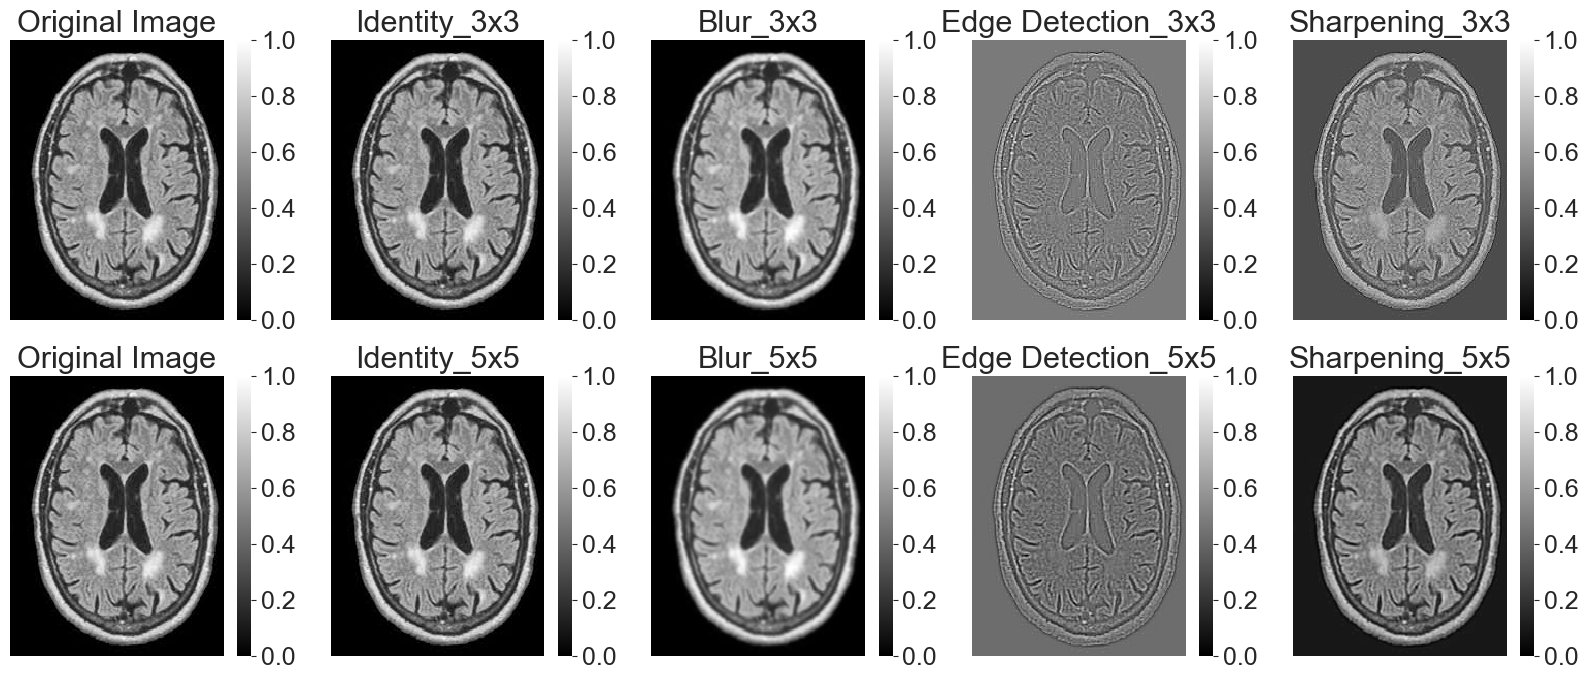

In [28]:
show_plt_sns(filters_3x3, filters_5x5, "all")

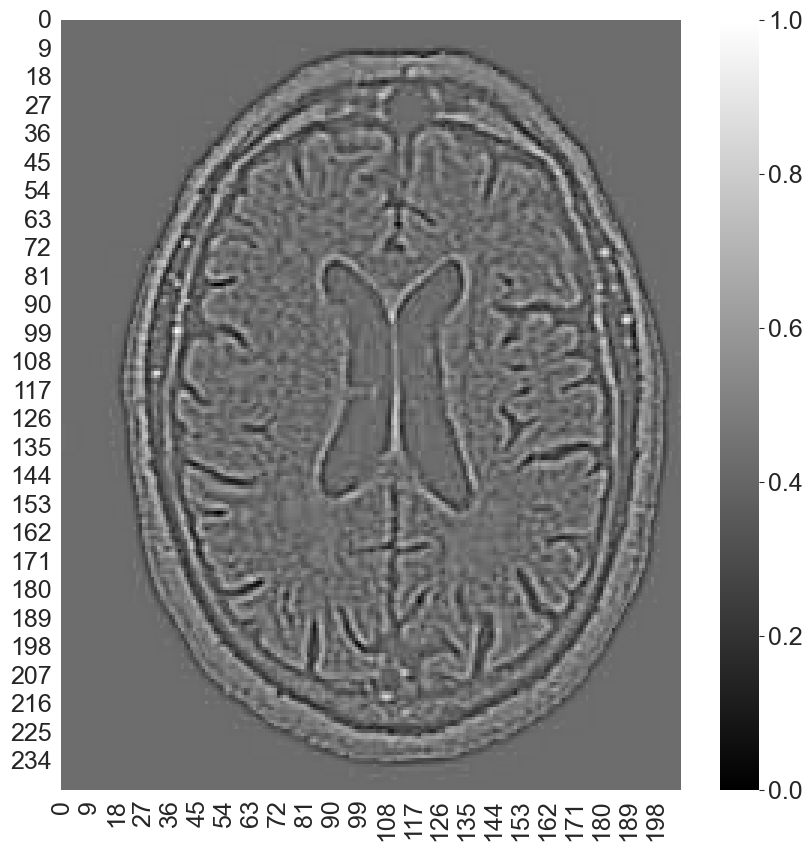

In [29]:
# 히트맵 생성
plt.figure(figsize=(10, 10))
sns.heatmap(apply_convolution(normalized_image, Edge_Detection_5x5), cmap='gray')
plt.show()